Tiempo medio de espera:  0.09528566731850507
Fracción de solicitudes que no esperaron para ser procesadas:  89.63499999999999 %
Tiempo medio en resolver un diagnóstico:  0.9155203918551819
Tiempo total:  399871.7959294034


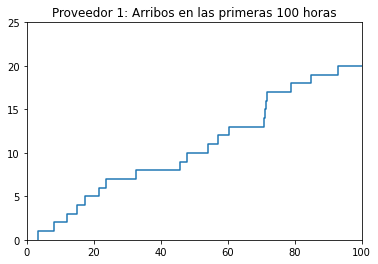

In [46]:
#Un instituto de investigación debe decidir la inversión a realizar en equipos de diagnóstico de una nueva enfermedad.
#Se debe decidir la compra de equipos entre las opciones brindadas por 2 proveedores:
#El proveedor 1 plantea utilizar 2 unidades de diagnóstico en paralelo. Con probabilidad 𝑝 = 0.6 las muestras serán
#diagnosticados por la unidad 1 y con probabilidad 𝑞 = 1 − 𝑝 son diagnosticados por la unidad 2. El tiempo que demora
#cada unidad en resolver una solicitud sigue una distribución exponencial con medias, 𝜇1 = 0,7 hrs y 𝜇2 = 1 hr
#respectivamente.
#El proveedor 2 considera utilizar 1 unidad. En este caso la demora en resolver una solicitud sigue una distribución
#exponencial con 𝜇 = 0,8 horas.
#Se estima que el tiempo que transcurre entre la llegada de cada muestra se puede modelar según una distribución
#exponencial con media 𝜇 = 4 horas
#Simular para cada opción 100.000 solicitudes procesadas, determinando:
#El tiempo medio de espera entre que la solicitud llega y puede ser procesada.
#La fracción de las solicitudes que no esperaron para ser procesadas.
#La opción 1 es más costosa que la segunda opción y el instituto sólo acepta realizar la inversión si el tiempo
#medio que demora en resolver cada diagnóstico (tiempo en fila + tiempo de procesamiento) es como mínimo 50% menor
#que la opción 2. ¿Qué solución le recomienda?


import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

#PROVEEDOR 1

numero_solicitudes = 100000
media_arribos = 4
media_unidad_1 = 0.7
media_unidad_2 = 1

arribos = []
arribo = 0
ultimo_procesamiento_1 = 0
ultimo_procesamiento_2 = 0
solicitudes_sin_espera = 0
tiempo_espera = []
tiempo_total_diagnostico = 0

for i in range(numero_solicitudes):
    z = np.random.exponential(media_arribos)
    arribo += z
    arribos.append(arribo)
    
for arribo in arribos:
    
    n = np.random.rand()
    if n < 0.6:
        #UNIDAD 1
        tiempo = np.random.exponential(media_unidad_1)
        if ultimo_procesamiento_1 <= arribo:
            tiempo_espera.append(0)
            solicitudes_sin_espera += 1
            tiempo_total_diagnostico += tiempo
            ultimo_procesamiento_1 = arribo + tiempo
        else:
            tiempo_espera.append(ultimo_procesamiento_1 - arribo)
            tiempo_total_diagnostico += ultimo_procesamiento_1 - arribo + tiempo
            ultimo_procesamiento_1 += tiempo
    else:
        #UNIDAD 2
        tiempo = np.random.exponential(media_unidad_2)
        if ultimo_procesamiento_2 <= arribo:
            tiempo_espera.append(0)
            solicitudes_sin_espera += 1
            tiempo_total_diagnostico += tiempo
            ultimo_procesamiento_2 = arribo + tiempo
        else:
            tiempo_espera.append(ultimo_procesamiento_2 - arribo)
            tiempo_total_diagnostico += ultimo_procesamiento_2 - arribo + tiempo
            ultimo_procesamiento_2 += tiempo
        
print("Tiempo medio de espera: ", np.mean(tiempo_espera))
print("Fracción de solicitudes que no esperaron para ser procesadas: ", (solicitudes_sin_espera / numero_solicitudes) * 100, "%")
print("Tiempo medio en resolver un diagnóstico: ", tiempo_total_diagnostico / numero_solicitudes)
print("Tiempo total: ", np.max([ultimo_procesamiento_1, ultimo_procesamiento_2]))

plt.step(arribos, range(numero_solicitudes))
plt.title('Proveedor 1: Arribos en las primeras 100 horas', fontsize=12)
plt.axis((0, 100, 0, 25))
plt.show()

Tiempo medio de espera:  0.20370026862964474
Fracción de solicitudes que no esperaron para ser procesadas:  79.82000000000001 %
Tiempo medio en resolver un diagnóstico:  1.0085962131874218
Tiempo total:  399872.6683935353


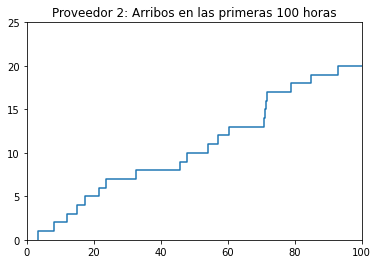

In [45]:
#PROVEEDOR 2

np.random.seed(0)

numero_solicitudes = 100000
media_arribos = 4
media_unidad = 0.8

arribos = []
arribo = 0
ultimo_procesamiento = 0
solicitudes_sin_espera = 0
tiempo_espera = []
tiempo_total_diagnostico = 0

for i in range(numero_solicitudes):
    z = np.random.exponential(media_arribos)
    arribo += z
    arribos.append(arribo)
    
for arribo in arribos:
    
    tiempo = np.random.exponential(media_unidad)
    if ultimo_procesamiento <= arribo:
        tiempo_espera.append(0)
        solicitudes_sin_espera += 1
        tiempo_total_diagnostico += tiempo
        ultimo_procesamiento = arribo + tiempo
    else:
        tiempo_espera.append(ultimo_procesamiento - arribo)
        tiempo_total_diagnostico += ultimo_procesamiento - arribo + tiempo
        ultimo_procesamiento += tiempo  
        
print("Tiempo medio de espera: ", np.mean(tiempo_espera))
print("Fracción de solicitudes que no esperaron para ser procesadas: ", (solicitudes_sin_espera / numero_solicitudes) * 100, "%")
print("Tiempo medio en resolver un diagnóstico: ", tiempo_total_diagnostico / numero_solicitudes)
print("Tiempo total: ", ultimo_procesamiento)

plt.step(arribos, range(numero_solicitudes))
plt.title('Proveedor 2: Arribos en las primeras 100 horas', fontsize=12)
plt.axis((0, 100, 0, 25))
plt.show()